In [17]:
# read data, compulsory
import json

import torch

# variables
ckpt_path = '../../../ai4ps_logs/checkpoints/soqy_checkpoint.pt'

data = torch.load(ckpt_path)
print(type(data))
print(data.keys())

predictions = list(data['targets']['predictions'].reshape(-1).numpy())
targets = data['targets']['targets']

<class 'dict'>
dict_keys(['state_dict', 'loss', 'val_loss_list', 'targets'])


0.18751734495162964


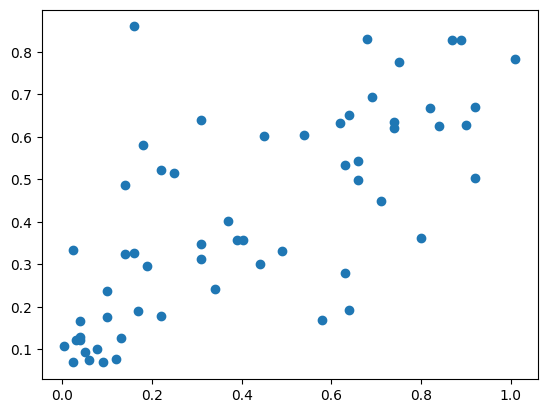

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

np_pred = np.array(predictions)
np_targ = np.array(targets)
r2 = 1 - np.mean((np_pred - np_targ)**2)/np.var(np_pred)
print(r2)
plt.scatter(targets, predictions)
plt.show()

In [1]:
# read ensemble data, optional
import json
import torch


# variables
ckpt_template = '../../../ai4ps_logs/checkpoints/soqy_5f_rg_rmo2_ens0_fold_0_checkpoint.pt'
fold = 1 # 3

ckpt_path = ckpt_template.replace('fold_0', f'fold_{fold}')
data = torch.load(ckpt_path)

predictions = [list(data['targets']['predictions'].reshape(-1).numpy())]
targets = [list(data['targets']['targets'].numpy())]

for i in range(1,4):
    ckpt_path = ckpt_template.replace('ens0', f'ens{i}').replace('fold_0', f'fold_{fold}')
    data = torch.load(ckpt_path)
    predictions.append(list(data['targets']['predictions'].reshape(-1).numpy()))
    targets.append(data['targets']['targets'])

predictions = torch.tensor(predictions)
targets = torch.tensor(targets)
predictions = predictions.mean(dim=0)
targets = targets.mean(dim=0)

0.6814203560352325


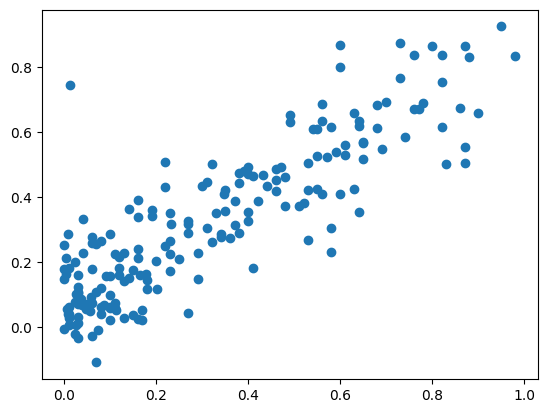

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

np_pred = np.array(predictions)
np_targ = np.array(targets)
r2 = 1 - np.mean((np_pred - np_targ)**2)/np.var(np_pred)
print(r2)
plt.scatter(targets, predictions)
plt.show()

<class 'dict'>
dict_keys(['state_dict', 'loss', 'val_loss_list', 'targets'])
0.7181312143802643


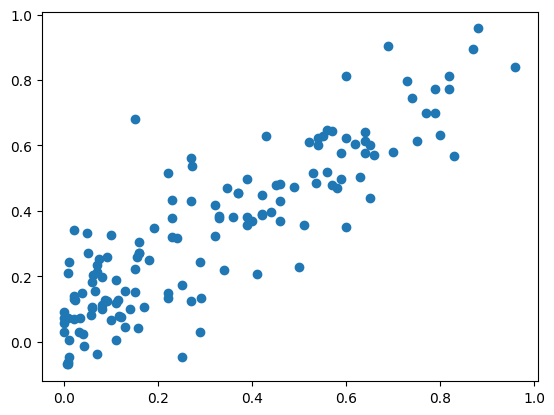

In [11]:
# read data, rmo3
import json
import torch

# variables
# seed  = 32 or 52
ckpt_path = '../../../ai4ps_logs/checkpoints/soqy_5f_rg_rmo3_ens0_seed_52_checkpoint.pt'

data = torch.load(ckpt_path)
print(type(data))
print(data.keys())

predictions = list(data['targets']['predictions'].reshape(-1).numpy())
targets = data['targets']['targets']

from matplotlib import pyplot as plt
import numpy as np

np_pred = np.array(predictions)
np_targ = np.array(targets)
r2 = 1 - np.mean((np_pred - np_targ)**2)/np.var(np_pred)
print(r2)
plt.scatter(targets, predictions)
plt.show()